In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pylab
import matplotlib.pyplot as plt
import numpy as np
import plt_mp #in this ipynb directory
#from fossim/src
import plain_wave as pw
import mask_circular as mc
import no_coronagraph as nc

## perfect pupil

In [2]:
n=1024 # sampling rate at a pupil
pos_star=[0.0,0.0] #angle in unit of lambda/D
pupa_perfect = pw.wg_plain_wave(n,pos_star)
mask=mc.p2pm_circular(pupa_perfect)
pupa_perfect[mask]=0.0+0.0j
#plt_mp.plotpup(pupa_perfect,small=True)
exprat=8 #oversampling factor at a focal plane
foca_perfect = nc.cf_no_coronagraph(pupa_perfect,exprat=exprat)
#plt_mp.plotfoc2D(foca_perfect,exprat)
#plt_mp.plotfoc1D(foca_perfect,foca_perfect,exprat)

## your configulation (Gaussian Random)

In [24]:
def hexa(nH,dl,n,xa,ya):
    for j in range(0,nH):
        xa.append((0.5+dl*j)*n)
        ya.append(0.5*n)
        xa.append((0.5-dl*j)*n)
        ya.append(0.5*n)
        xa.append((0.5+dl*(j+1)*0.5)*n)
        ya.append((0.5+dl*np.sqrt(3)/2*(j+1))*n)
        xa.append((0.5-dl*(j+1)*0.5)*n)
        ya.append((0.5+dl*np.sqrt(3)/2*(j+1))*n)      
        xa.append((0.5+dl*(j+1)*0.5)*n)
        ya.append((0.5-dl*np.sqrt(3)/2*(j+1))*n)
        xa.append((0.5-dl*(j+1)*0.5)*n)
        ya.append((0.5-dl*np.sqrt(3)/2*(j+1))*n) 
    return xa, ya

In [40]:
dlt/dl/4

0.12704918032786885

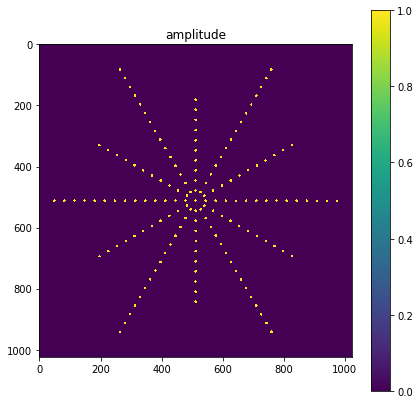

In [38]:
tag="hexa"

pupa = pw.wg_plain_wave(n,pos_star)
Nw=30
dl=1/(Nw+1)
dlt=1/(2*Nw+1)
ff=0.3
xa=[]
ya=[]
nH=11
ya,xa=hexa(nH,dl,n,xa,ya)
nH=15
xa,ya=hexa(nH,dl,n,xa,ya)
    
maskr=mc.p2pm_circular(pupa,[ya,xa],n/4*dlt)
pupa[maskr]=0.0+0.0j
masku=mc.p2pm_circular(pupa)
mask=maskr | masku
pupa[mask]=0.0+0.0j

plt_mp.plotpup(pupa,filename="pup_"+tag+".png")

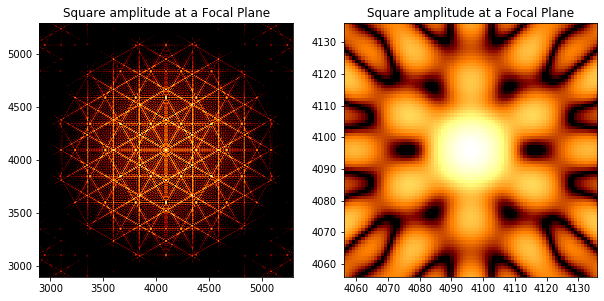

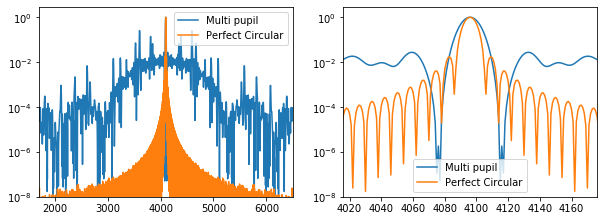

In [39]:
exprat=8 #oversampling factor at a focal plane
foca = nc.cf_no_coronagraph(pupa,exprat=exprat)
plt_mp.plotfoc2D(foca,exprat,filename="foc2d_"+tag+".png")
plt_mp.plotfoc1D(foca,foca_perfect,exprat,filename="foc1d_"+tag+".png",ymin=1.e-8)